## Exercise Set 1 for OSM 

### Dynamic Programming with John Stachurski

This notebook contains the first set of exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

Consider the data

In [2]:
A = [[0.6, 0.1, -0.3],
     [0.5, -0.4, 0.2],
     [1.0, -0.2, 1.1]]

b = [[12],
     [10],
     [-1]]

A, b = map(np.asarray, (A, b))

The equation $x = A x + b$ has a unique solution in $\mathbb R^3$.  Show that this is true by checking the spectral radius condition.

In [3]:
from scipy.linalg import eigvals, solve
evs = eigvals(A)
ρ = max(abs(evs))
print(ρ)

0.965538166352


Compute the solution using both successive approximations --- that is,

$$ x_{t+1} = A x_t + b $$

and matrix algebra.

In [6]:
#successive approximation
x_now = np.array([[1], [1], [1]])
x_prev = np.array([[0], [0], [0]])
while abs(x_now - x_prev).sum() > 1e-5:
    x_prev = x_now
    x_now = A@x_prev + b
print(x_now)

#using linear algebra
x_ans = solve(np.eye(A.shape[0]) - A, b)
print(x_ans)

[[ -0.89551467]
 [ 13.34328131]
 [ 45.64176737]]
[[ -0.89552239]
 [ 13.34328358]
 [ 45.64179104]]


### Exercise 2

In a standard job search model, an agent 


* receives offer $w_t$ in period $t$ where $\{w_t\}$ is  iid
* accepts this offer at time $t$ or remains unemployed
    *  if remains unemployed, then receives compensation $c > 0$
    * if accepts, then works indefinitely at this wage

The agent discounts the future at rate $\beta \in (0, 1)$


It can be shown that the following is an optimal strategy: 

* Set a reservation wage $\bar w$
* Accept the first offer $w_t$ such that $w_t \geq \bar w$


It can also be shown (details omitted) that $\bar w$ should satisfy

$$
    \bar w
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, \bar w
    \right\}
    \, p_k
$$

Here 

* $w_1, \ldots, w_K$ are the possible wage values, occuring with probabilities $p_1, \ldots, p_K$
* $c > 0$

Does there always exists a $x \in [0, \infty)$ that solves the equation
$$
    x
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, x
    \right\}
    \, p_k
$$
Is it unique?  Suggest a strategy for computing it

#### Hints

There are different ways to show this, but I found the following facts useful:

*  If $x_1, \ldots, x_K$ are any $K$ numbers, then

$$ \left| \sum_{k=1}^K x_k \right| \leq \sum_{k=1}^K |x_k| $$

* For any $a, x, y$ in $\mathbb R$, 
    
$$ 
    \left| 
            \max \left\{ a,\, x \right\} - \max \left\{ a,\, y \right\} 
        \right|
        \leq | x - y |
$$


You can convince yourself of the second inequality by sketching and checking different cases...

### Exercise 3

Let 

* $\beta = 0.96$
* $(w_1, w_2, w_3) = (0.5, 1.0, 1.5)$
* $(p_1, p_2, p_3) = (0.2, 0.4, 0.4)$

Compute and plot the reservation wage for unemployment compensation values

In [10]:
c_vals = np.linspace(1, 2, 100)

Is the reservation wage increasing or decreasing in this value?  Does that coincide with your intuition?

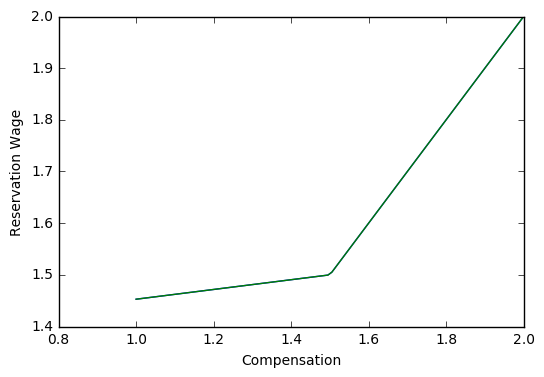

In [12]:
def find_res_wage(c, beta, w_arr, p_arr, x_init):
    x_now = x_init
    x_prev = x_init - 2
    while abs(x_now - x_prev) > 1e-5:
        x_prev = x_now
        x_now = c * (1 - beta) + beta * np.maximum(w_arr, x_prev) @ p_arr
    return x_now

beta = 0.96
w_arr = np.array([0.5,1.0,1.5])
p_arr = np.array([0.2,0.4,0.4])
x_list = []
for c in c_vals:
    x_res = find_res_wage(c, beta , w_arr, p_arr, c)
    x_list.append(x_res)
plt.plot(c_vals, x_list)
plt.xlabel('Compensation')
plt.ylabel('Reservation Wage')
plt.show()
#after compensation. = 1.5, reservation wage linearly increasing with compensation